# Timing the scalar-vector functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import my_functions as mf

In [2]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000])

In [3]:
for Ni in N:
    print(Ni)

100
300
500
700
1000


In [5]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
for Ni in N:
    scalar = 1
    vector = np.ones(Ni)
    # scalar_vec_real_dumb
    time = %timeit -o -n 100 -r 100 mf.scalar_vec_real_dumb(scalar, vector)
    list_time_dumb.append(time.average)
    # scalar_vec_real_numpy
    time = %timeit -o -n 100 -r 100 mf.scalar_vec_real_numpy(scalar, vector)
    list_time_numpy.append(time.average)
    # scalar_vec_real_numba
    time = %timeit -o -n 100 -r 100 mf.scalar_vec_real_numba(scalar, vector)
    list_time_numba.append(time.average)

389 µs ± 17.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
4.79 µs ± 514 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 2334.80 times longer than the fastest. This could mean that an intermediate result is being cached.
28.1 µs ± 268 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.13 ms ± 27.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
5.3 µs ± 307 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.43 µs ± 345 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.91 ms ± 57 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
5.44 µs ± 469 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.48 µs ± 393 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
2.68 ms ± 61.2 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
8.32 µs ± 1.26 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.52 µs ± 336 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
3.

In [6]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)

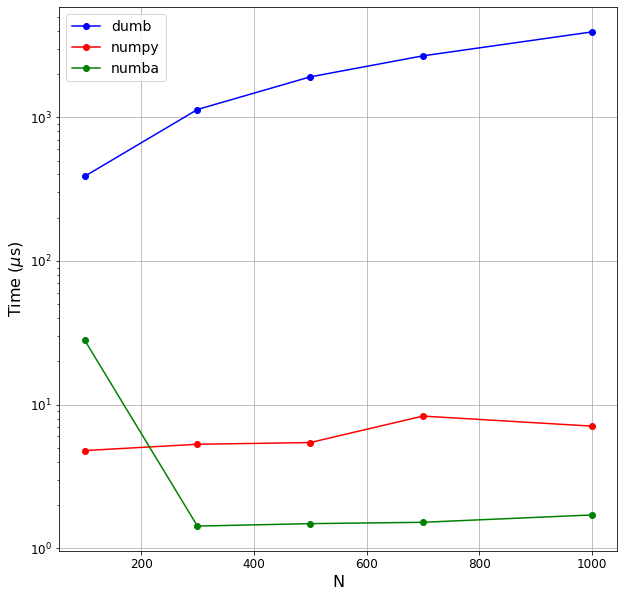

In [7]:
plt.figure(figsize=(10,10))
plt.plot(N, list_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N, list_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'go-', label = 'numba')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()